In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import regex as re
from textblob import TextBlob
import nltk
nltk.download('vader_lexicon')
nltk.download('words')
words = set(nltk.corpus.words.words())
nltk.download('punkt');
import re
from wordcloud import WordCloud, STOPWORDS 
import requests
from nltk.stem import WordNetLemmatizer
import plotly as py
import plotly.graph_objs as go
import gensim
from gensim import corpora, models, similarities
import logging
import tempfile
from nltk.corpus import stopwords
from string import punctuation
from collections import OrderedDict
import seaborn as sns
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer 
import os
import plotly.express as px
pd.options.plotting.backend = "plotly"
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel


pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1125)>
[nltk_data] Error loading words: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1125)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1125)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     self signed certificate (_ssl.c:1125)>
/opt/anaconda3/lib/python3.8/site-packages/plotly/express/imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),


In [5]:
df = pd.read_csv('https://raw.githubusercontent.com/AlisonIsAnArtist/Canadian-Healthcare-System/main/chs.csv')

In [6]:
df.head()

Unnamed: 0            ID                       Date             User  \
0           0  1.624560e+18  2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18  2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18  2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18  2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18  2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9859 non-null   int64  
 1   ID              9859 non-null   float64
 2   Date            9859 non-null   object 
 3   User            9859 non-null   object 
 4   Tweet           9859 non-null   object 
 5   replyCount      9859 non-null   int64  
 6   lang            9859 non-null   object 
 7   Place           126 non-null    object 
 8   rendercontents  9859 non-null   object 
 9   Like_Count      9859 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 770.4+ KB


In [8]:
df['Date'] =  pd.to_datetime(df['Date'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 770.4+ KB


In [10]:
df.head()

Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [11]:
max(df['replyCount'])

3324

In [12]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [13]:

df['Dates'].value_counts().plot(kind = 'bar', title = 'Time Series Analysis of Tweets')

In [14]:
date_prop = df['Dates'].value_counts()/len(df.Dates)*100

In [15]:
# Create new columns
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9859 entries, 0 to 9858
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Unnamed: 0      9859 non-null   int64              
 1   ID              9859 non-null   float64            
 2   Date            9859 non-null   datetime64[ns, UTC]
 3   User            9859 non-null   object             
 4   Tweet           9859 non-null   object             
 5   replyCount      9859 non-null   int64              
 6   lang            9859 non-null   object             
 7   Place           126 non-null    object             
 8   rendercontents  9859 non-null   object             
 9   Like_Count      9859 non-null   int64              
 10  Dates           9859 non-null   object             
 11  Time            9859 non-null   object             
 12  day             9859 non-null   int64              
 13  month           9859 non-null   i

In [17]:
df['year'].value_counts()/len(df.Dates)*100

2022    80.403692
2023    19.596308
Name: year, dtype: float64

In [18]:
df['year'].value_counts().plot.bar()

In [19]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year  
0           1  2023-02-11  23:45:44   11      2  2023  
1           0  2023-02-11  23:32:45   11      2  2023

In [20]:
df['Hashtags'] = df['Tweet'].str.findall(r'#.*?(?=\s|$)')

In [21]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  
0           1  2023-02-11  23:45:44   11      2  2023       []  
1           0  2023-02-11  23:32:45   11      2  2023       []

In [22]:
df['mentions'] = df['Tweet'].str.findall(r'[＠@]([^][\s#<>|{}]+)')

In [23]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]  
1                                   [tomcollins80, EdtheSock, babsy1234]

In [24]:
def remove_hashtags_usernames(tweet):
    # Use regex to match hashtags (starting with #) and usernames (starting with @)
    tweet = re.sub(r'#\w+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r"http\S+", "", tweet)
    return tweet

cleaned_tweets = []
for tweet in df['Tweet']:
    cleaned_tweet = remove_hashtags_usernames(tweet)
    cleaned_tweet = re.sub('\W+',' ', cleaned_tweet )
    cleaned_tweets.append(cleaned_tweet)


In [25]:
df['cleaned_tweets'] = cleaned_tweets

comment_words = '' 
add_stop = ['will','need','want','https', 'rt', 'healthcare', 'system', 'canadian','canada','canadians','the','in','is','it','on','amp','us','a','i','u','s','dont','t','re','don','m','ve', 'i','1', '2', '3', '4','5','6', '7', '8', '9','0']
stopwords = set(list(STOPWORDS)+add_stop)  

df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: ' '.join([word.lower() for word in x.split() if word not in (stopwords)]))


In [26]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  \
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]   
1                                   [tomcollins80, EdtheSock, babsy1234]   

                                                                                                                                             cleaned_tweets  
0  bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills  
1                         great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc

In [27]:
for val in df['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

In [28]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)

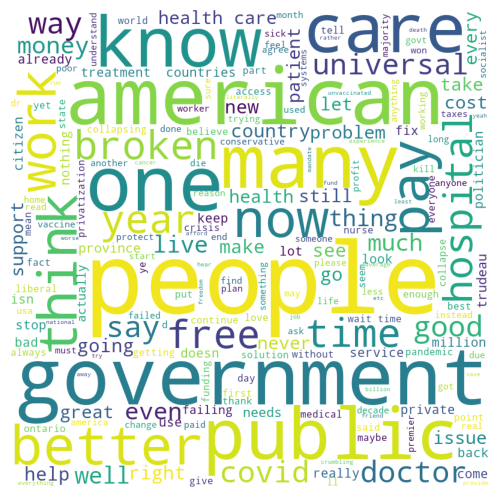

In [29]:
plt.figure( facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [30]:
# grouped_df = df.groupby('Tweet')['replyCount'].sum()
grouped_df = df[['User','Tweet','replyCount']].sort_values(by = 'replyCount',ascending=False)[:10]
# grouped_df = pd.DataFrame(grouped_df.sort_values(ascending=False)[:10] ).reset_index()

fig = go.Figure(data=[go.Table(
    header=dict(values=list(grouped_df.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=grouped_df.transpose().values.tolist(),
               fill_color='lavender',
               align='left'))
])

fig.show()

In [31]:
# Create the table
grouped_df = df.groupby('Tweet')['replyCount'].sum()
web_table = pd.DataFrame(grouped_df.sort_values(ascending=False)[:10]).reset_index()
 
fig = go.Figure(data=[go.Table(
    header=dict(values=list(web_table.columns), fill_color='lightgray', align='left'),
    cells=dict(values=[web_table[col] for col in web_table.columns], align='left')
)])

# Modify the table
fig.update_layout(
    title='Table Visualization',
    width=800,
    height=400
)

# Show the plot
fig.show()

In [32]:
# Define the sentiment objects using TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()


sentiment_objects = [sia.polarity_scores(tweet) for tweet in df['cleaned_tweets']]

# sentiment_objects[0].polarity, sentiment_objects[0]

In [33]:
sentiment_objects[0]

{'neg': 0.153, 'neu': 0.847, 'pos': 0.0, 'compound': -0.5859}

In [34]:
# Create a list of polarity values and tweet text

sentiment_values = [sentiment_object['compound'] for sentiment_object in sentiment_objects]

# Print the value of the 0th row.

sentiment_values[0]
# Print all the sentiment values

sentiment_values[0:2]


[-0.5859, -0.3182]

In [35]:
# Create a dataframe of each tweet against its polarity

sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity"])
sentiment_df.head()
df['polarity'] = sentiment_df['polarity']

In [36]:
df.head()

Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [37]:
# Save the polarity column as 'n'.

n=sentiment_df["polarity"]

# Convert this column into a series, 'm'. 

m=pd.Series(n)

In [38]:
# Initialize variables, 'pos', 'neg', 'neu'.

pos=0
neg=0
neu=0

sentiment = []
# Create a loop to classify the tweets as Positive, Negative, or Neutral.
# Count the number of each.

for items in m:
    if items>0:
        sentiment.append("Positive")
        pos=pos+1
    elif items<0:
        sentiment.append("Negative")
        neg=neg+1
    else:
        sentiment.append("Neutral")
        neu=neu+1
        
print(pos,neg,neu)

4466 4388 1005


In [39]:
df['Sentiment'] = sentiment

In [40]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  \
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]   
1                                   [tomcollins80, EdtheSock, babsy1234]   

                                                                                                                                             cleaned_tweets  \
0  bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills   
1                         great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc   

   polarity Sentiment  
0   -0.5859  Negative  
1   -0.3182  Negative

In [41]:

# Select the top 10 users
sent_series = df.groupby('Dates')['polarity'].mean().reset_index()

# Plot the data in a stacked bar chart
fig = px.bar(sent_series, x='Dates', y='polarity', color='polarity', color_continuous_scale='Portland_r')

# Update the layout of the chart
fig.update_layout(title={
    'text': "Average Sentiment Over Time",
    'font': {'size': 24}
})


fig.show()
# df['Dates'].value_counts(by = 'Sentiment').plot(color=df.columns, figsize=(5, 3), kind = 'bar', title = 'Time Series Analysis of Tweets')

In [42]:
table_sent_count = pd.crosstab(df['Dates'],df['Sentiment']).reset_index()
table_sent_count.head()


Sentiment       Dates  Negative  Neutral  Positive
0          2022-01-01         3        0         6
1          2022-01-02         5        0         9
2          2022-01-03        10        3        16
3          2022-01-04        14        5        14
4          2022-01-05        10        3        14

In [43]:
# Create Line plot
fig = px.line(table_sent_count, x=table_sent_count['Dates'], y=table_sent_count['Negative'])
fig.add_scatter(x=table_sent_count['Dates'], y=table_sent_count['Positive'])
fig.add_scatter(x=table_sent_count['Dates'], y=table_sent_count['Neutral'])
fig.update_traces(textposition='top center')

fig.update_layout(colorway = ['#7f7f7f', '#bcbd22', '#17becf'],
    title="Sentiment Time Series Analysis of Tweet Count",
    xaxis_title="Dates",
    yaxis_title="Setiment Count",
    legend_title="Sentiment",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"))
fig.show()

In [44]:
grouped_df = df.groupby(['User', 'Sentiment'])['replyCount'].sum().reset_index()

# Select the top 10 users
top_10_df = grouped_df.groupby('User').sum().sort_values(by='replyCount', ascending=False).reset_index().head(10)

# Merge the data with the original DataFrame to get the sentiment information
merged_df = pd.merge(grouped_df, top_10_df, on='User', how='inner')

# Remove the neutral sentiment
merged_df = merged_df[merged_df['Sentiment'] != 'Neutral']

# Plot the data in a stacked bar chart
fig = px.bar(merged_df, x='User', y='replyCount_y', color='Sentiment', barmode='stack', color_discrete_sequence=['red', 'green'])

# Update the layout of the chart
fig.update_layout(title={
    'text': "Top 10 Users with the Most Reply Count",
    'font': {'size': 24}
})


fig.show()

In [45]:
merged_df.head()

User Sentiment  replyCount_x  replyCount_y
0     AmieVarley  Negative             4           355
2     AmieVarley  Positive           347           355
3   HMcPhersonMP  Positive           407           407
4    TariqElnaga  Positive           327           327
5  TheBabylonBee  Negative           622           622

In [46]:
# Group the data by user and sum the replyCount for each user
grouped_df = df.groupby(['User', 'Sentiment'])['Like_Count'].sum().reset_index()

# Select the top 10 users
top_10_df = grouped_df.groupby('User').sum().sort_values(by='Like_Count', ascending=False).reset_index().head(10)

# Merge the data with the original DataFrame to get the sentiment information
merged_df = pd.merge(grouped_df, top_10_df, on='User', how='inner')

# Remove the neutral sentiment
merged_df = merged_df[merged_df['Sentiment'] != 'Neutral']

# Plot the data in a stacked bar chart
fig = px.bar(merged_df, x='User', y='Like_Count_y', color='Sentiment', barmode='stack', color_discrete_sequence=['red', 'green'])

# Update the layout of the chart
fig.update_layout(title={
    'text': "Top 10 Users with the Most Reply Count",
    'font': {'size': 24}
})

# Show the chart
fig.show()

In [47]:
e_words= [i.strip().lower().split(' ') for i in df['cleaned_tweets']]
e_words[2]

['no',
 'i',
 'said',
 'i',
 'trying',
 'canadian',
 'culture',
 'partner',
 'canadian',
 'escaping',
 'taxes',
 'third',
 'world',
 'cbc',
 'obvious',
 'hit',
 'piece',
 'anything',
 'liberal',
 'green',
 'ndp',
 'they',
 'afraid',
 'obscure',
 'quebec',
 'parties']

In [48]:
list_words = []
lemmatizer = WordNetLemmatizer()

for s in e_words:
    word = []
    for w in s:
        rootWord=lemmatizer.lemmatize(w)
        word.append(rootWord)
    list_words.append(word)

In [49]:
df['words'] = list_words

In [50]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  \
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]   
1                                   [tomcollins80, EdtheSock, babsy1234]   

                                                                                                                                             cleaned_tweets  \
0  bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills   
1                         great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc   

   polarity Sentiment  \
0   -0.5859  Negative   
1   -0.3182  Negative   

                                                                                                                                                                           words  
0  [bullshit, i, never, met, canadian, brit, willingly, trade, private, insurance, u, wait, see, doctor, canada, doesn, come, side, bankruptcy, i, health, insurance, med, bill]  
1                     [great, story, brah, allow, file, shit, never, happened, third, world, and, much, your, medical, debt, no, way, canadian, said, i, repeat, even, get, cbc]

In [51]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_pos = df.where(df["Sentiment"] == 'Positive')
df_pos.dropna(inplace = True)

In [52]:
df_pos.head(2)

Unnamed: 0            ID                      Date            User  \
84         84.0  1.623760e+18 2023-02-09 19:13:58+00:00  jdouglaslittle   
361       361.0  1.622590e+18 2023-02-06 13:30:03+00:00      Hanigsberg   

                                                                                                                                                                                                                                                                                Tweet  \
84   Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want "a healthcare system" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nhttps://t.co/8yFaOFEJdW   
361                                       @brittlestar Yup: “a vast majority of Canadians surveyed, 85 per cent, now say they believe ‘drastic changes’ are needed in the health system to meet the needs of the community” A ringing endorsement for a healthcare system that works.   

     replyCount lang  \
84          0.0   en   
361         0.0   en   

                                                                                                                                       Place  \
84   Place(id='1e5cb4d0509db554', fullName='Vancouver, British Columbia', name='Vancouver', type='city', country='Canada', countryCode='CA')   
361               Place(id='3797791ff9c0e4c6', fullName='Toronto, Ontario', name='Toronto', type='city', country='Canada', countryCode='CA')   

                                                                                                                                                                                                                                                              rendercontents  \
84   Yes it's not enough but BOTH the provinces and feds have to put more on the table. Canadians dont want "a healthcare system" they want the worlds best system.\n\nTrudeau's health care offer not enough to address urgent issues in Alberta: critics\n\nflip.it/wsl1lY   
361                              @brittlestar Yup: “a vast majority of Canadians surveyed, 85 per cent, now say they believe ‘drastic changes’ are needed in the health system to meet the needs of the community” A ringing endorsement for a healthcare system that works.   

     Like_Count       Dates      Time  day  month    year Hashtags  \
84          0.0  2023-02-09  19:13:58  9.0    2.0  2023.0       []   
361         5.0  2023-02-06  13:30:03  6.0    2.0  2023.0       []   

          mentions  \
84              []   
361  [brittlestar]   

                                                                                                                                      cleaned_tweets  \
84             yes enough both provinces feds put table canadians worlds best trudeau health care offer enough address urgent issues alberta critics   
361  yup vast majority canadians surveyed 85 per cent now say believe drastic changes needed health meet needs community a ringing endorsement works   

     polarity Sentiment  \
84     0.8658  Positive   
361    0.3182  Positive   

                                                                                                                                                                  words  
84                 [yes, enough, both, province, fed, put, table, canadian, world, best, trudeau, health, care, offer, enough, address, urgent, issue, alberta, critic]  
361  [yup, vast, majority, canadian, surveyed, 85, per, cent, now, say, believe, drastic, change, needed, health, meet, need, community, a, ringing, endorsement, work]

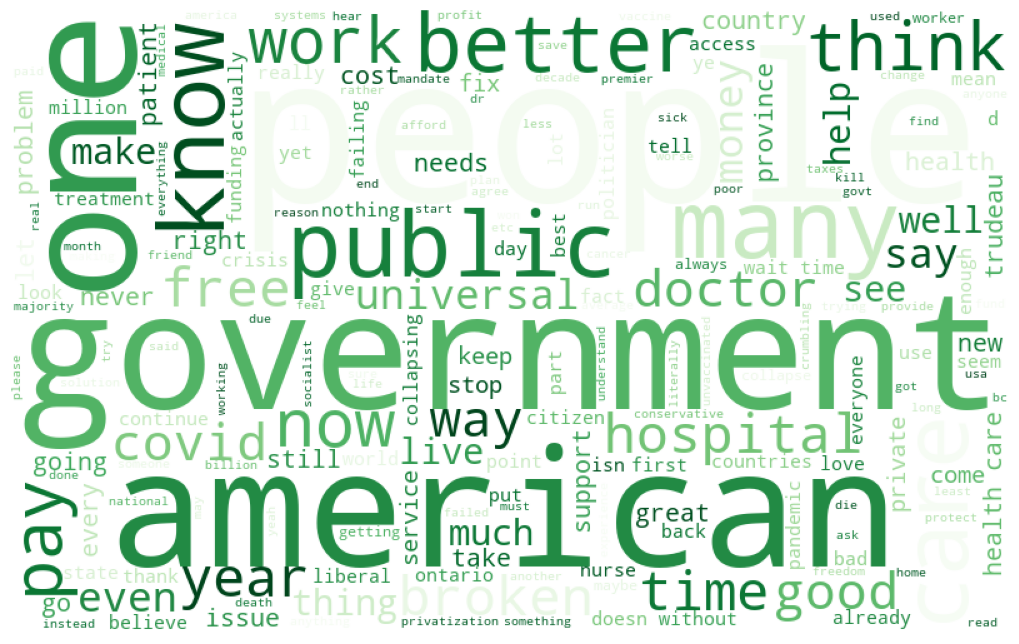

In [53]:
for val in df_pos['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Greens',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

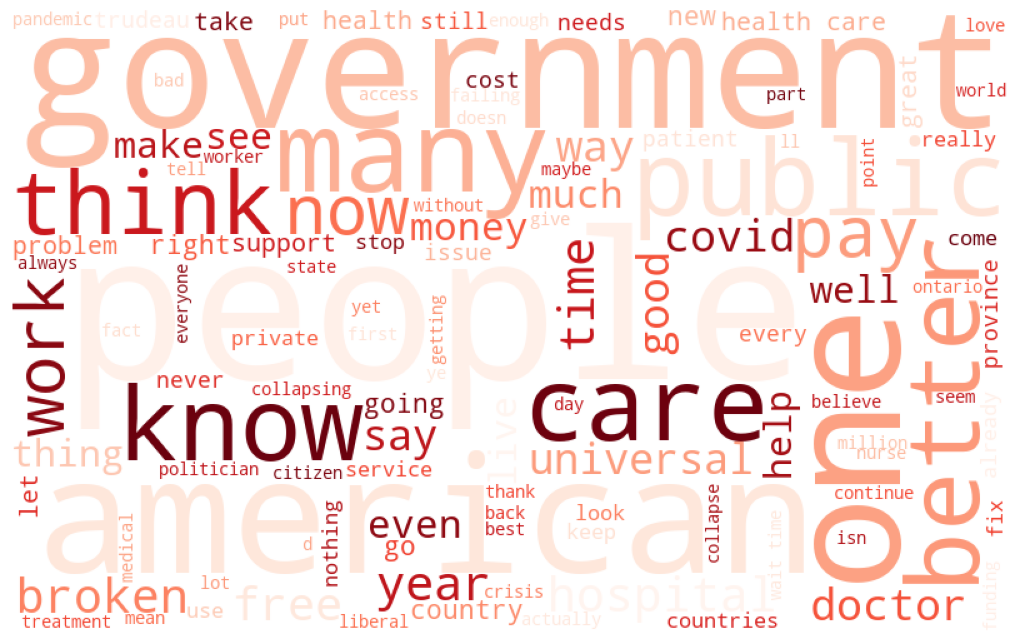

In [54]:
# df_pos = df['Sentiment'].filter(like='Positive', axis=0)
df_neg = df.where(df["Sentiment"] == 'Negative')
df_neg.dropna(inplace = True)

for val in df_neg['cleaned_tweets']: 
      
    val = str(val) 
  
    tokens = val.split() 
      
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                stopwords = stopwords,
                      colormap = 'Reds',
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = 'white', edgecolor='blue') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Topic Modelling

In [55]:
corpus_og=[]
cleaned_words_c = []
a=[]
for i in range(len(df['words'])):
    a = [word for word in df['words'][i] if word not in stopwords]
    corpus_og.append(' '.join(a))
    cleaned_words_c.append(a)
corpus_og[0]

'bullshit never met brit willingly trade private insurance wait see doctor doesn come side bankruptcy health insurance med bill'

In [56]:
df['cleaned_words']=corpus_og
df['cleaned_words_c']=cleaned_words_c
df.head()

Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [57]:
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T" will be used to save temporary dictionary and corpus.


In [58]:
df.head(20)

Unnamed: 0            ID                      Date             User  \
0            0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1            1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2            2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3            3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4            4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   
5            5  1.624520e+18 2023-02-11 21:38:55+00:00      JayneKimlee   
6            6  1.624520e+18 2023-02-11 21:19:58+00:00        Nikon_Don   
7            7  1.624520e+18 2023-02-11 21:15:30+00:00       vaestervik   
8            8  1.624520e+18 2023-02-11 21:09:56+00:00    reindeer_eros   
9            9  1.624510e+18 2023-02-11 20:52:02+00:00       wanderinby   
10          10  1.624500e+18 2023-02-11 20:08:54+00:00         teririch   
11          11  1.624490e+18 2023-02-11 19:43:21+00:00      shotta30000   
12          12  1.624490e+18 2023-02-11 19:33:19+00:00      CoryBMorgan   
13          13  1.624490e+18 2023-02-11 19:30:23+00:00      BrianduNord   
14          14  1.624470e+18 2023-02-11 18:04:28+00:00        Anstria_G   
15          15  1.624460e+18 2023-02-11 17:11:50+00:00       Bon_Bon416   
16          16  1.624430e+18 2023-02-11 15:38:59+00:00    Odd_but_still   
17          17  1.624430e+18 2023-02-11 15:31:39+00:00      nuserynotes   
18          18  1.624430e+18 2023-02-11 15:27:27+00:00  therealjantzenw   
19          19  1.624430e+18 2023-02-11 15:17:36+00:00  NeilMit42376137   

                                                                                                                                                                                                                                                                                                                                                              Tweet  \
0           @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                                   @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                                        @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                                        https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                             @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   
5                                                @my2_cents @FulfillHeaven Not sure what this has to do with JMac, but I’m Canadian and our healthcare system is far from fair or perfect- people have to wait for months for treatment they need,like MRI’s,and yet the system is

In [59]:
texts = df['cleaned_words_c']

dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'elon.dict'))  # store the dictionary, for future reference

2023-02-16 09:58:55,100 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2023-02-16 09:58:55,412 : INFO : built Dictionary(12362 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'come']...) from 9859 documents (total 136606 corpus positions)
2023-02-16 09:58:55,440 : INFO : Dictionary lifecycle event {'msg': "built Dictionary(12362 unique tokens: ['bankruptcy', 'bill', 'brit', 'bullshit', 'come']...) from 9859 documents (total 136606 corpus positions)", 'datetime': '2023-02-16T09:58:55.413315', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'created'}
2023-02-16 09:58:55,449 : INFO : Dictionary lifecycle event {'fname_or_handle': '/var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.dict', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-02-16T09:58:55.449380', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n

In [60]:
corpus = [dictionary.doc2bow(text) for text in texts]
corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'elon.mm'), corpus)  # store to disk, for later use

2023-02-16 10:00:10,955 : INFO : storing corpus in Matrix Market format to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-16 10:00:10,957 : INFO : saving sparse matrix to /var/folders/4p/4ypxm_cx4zz7fy_6y9bywk_r0000gn/T/elon.mm
2023-02-16 10:00:10,958 : INFO : PROGRESS: saving document #0
2023-02-16 10:00:10,999 : INFO : PROGRESS: saving document #1000
2023-02-16 10:00:11,050 : INFO : PROGRESS: saving document #2000
2023-02-16 10:00:11,092 : INFO : PROGRESS: saving document #3000
2023-02-16 10:00:11,129 : INFO : PROGRESS: saving document #4000
2023-02-16 10:00:11,163 : INFO : PROGRESS: saving document #5000
2023-02-16 10:00:11,197 : INFO : PROGRESS: saving document #6000
2023-02-16 10:00:11,232 : INFO : PROGRESS: saving document #7000
2023-02-16 10:00:11,270 : INFO : PROGRESS: saving document #8000
2023-02-16 10:00:11,312 : INFO : PROGRESS: saving document #9000
2023-02-16 10:00:11,343 : INFO : saved 9859x12362 matrix, density=0.108% (131214/121876958)
2023-02-16 10:0

In [61]:
tfidf = models.TfidfModel(corpus) # step 1 -- initialize a model

2023-02-16 10:00:37,829 : INFO : collecting document frequencies
2023-02-16 10:00:37,834 : INFO : PROGRESS: processing document #0
2023-02-16 10:00:37,964 : INFO : TfidfModel lifecycle event {'msg': 'calculated IDF weights for 9859 documents and 12362 features (131214 matrix non-zeros)', 'datetime': '2023-02-16T10:00:37.964121', 'gensim': '4.1.2', 'python': '3.8.8 (default, Apr 13 2021, 12:59:45) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'initialize'}


In [62]:
corpus_tfidf = tfidf[corpus]  # step 2 -- use the model to transform vectors

In [63]:
total_topics = 5

In [64]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

2023-02-16 10:01:37,972 : INFO : using symmetric alpha at 0.2
2023-02-16 10:01:37,976 : INFO : using symmetric eta at 0.2
2023-02-16 10:01:37,982 : INFO : using serial LDA version on this node
2023-02-16 10:01:38,000 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 9859 documents, updating model once every 2000 documents, evaluating perplexity every 9859 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-16 10:01:38,001 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-02-16 10:01:38,003 : INFO : PROGRESS: pass 0, at document #2000/9859
2023-02-16 10:01:39,219 : INFO : merging changes from 2000 documents into a model of 9859 documents
2023-02-16 10:01:39,274 : INFO : topic #0 (0.200): 0.017*"care" + 0.013*"public" + 0.010*"private" + 0.009*"people" + 0.008*"year" + 0.007*"health" + 0.006*"money" + 0.006*"free" + 0.005*"now" + 0

In [65]:
#Show first n important word in the topics:
lda.show_topics(total_topics,5)

[(0,
  '0.016*"care" + 0.011*"free" + 0.011*"health" + 0.009*"people" + 0.007*"year"'),
 (1,
  '0.010*"american" + 0.008*"health" + 0.007*"better" + 0.007*"care" + 0.007*"one"'),
 (2,
  '0.008*"year" + 0.008*"people" + 0.007*"time" + 0.007*"government" + 0.007*"doctor"'),
 (3,
  '0.009*"care" + 0.008*"people" + 0.007*"pay" + 0.006*"tax" + 0.006*"life"'),
 (4,
  '0.011*"covid" + 0.007*"government" + 0.007*"mandate" + 0.007*"many" + 0.006*"people"')]

In [66]:
data_lda = {i: OrderedDict(lda.show_topic(i,25)) for i in range(total_topics)}

In [67]:
df_lda = pd.DataFrame(data_lda)
df_lda = df_lda.fillna(0).T
print(df_lda.shape)

(5, 70)


In [68]:
df_lda.head()

care      free    health    people      year    public     issue  \
0  0.016139  0.010932  0.010617  0.008813  0.006817  0.006565  0.005738   
1  0.006870  0.000000  0.008243  0.006730  0.000000  0.004612  0.000000   
2  0.000000  0.000000  0.005844  0.007697  0.008062  0.004752  0.000000   
3  0.008508  0.000000  0.004117  0.008481  0.000000  0.000000  0.000000   
4  0.003567  0.000000  0.000000  0.006083  0.004877  0.000000  0.000000   

   universal       new       pay     great     right   medical       now  \
0   0.005481  0.004896  0.004822  0.004438  0.004213  0.004077  0.003739   
1   0.000000  0.000000  0.004848  0.000000  0.000000  0.000000  0.000000   
2   0.003651  0.000000  0.000000  0.000000  0.000000  0.000000  0.003848   
3   0.000000  0.000000  0.007490  0.000000  0.005221  0.000000  0.005123   
4   0.000000  0.000000  0.000000  0.000000  0.003623  0.004904  0.004470   

   american      help    better   private  patient  conservative       one  \
0  0.003444  0.003407  0.003364  0.003333  0.00329      0.003254  0.003237   
1  0.010385  0.000000  0.007155  0.004440  0.00000      0.000000  0.006831   
2  0.004133  0.000000  0.003943  0.000000  0.00000      0.000000  0.000000   
3  0.003847  0.000000  0.000000  0.000000  0.00000      0.000000  0.000000   
4  0.000000  0.003431  0.000000  0.000000  0.00000      0.000000  0.005063   

       time    doctor   service     visit        go  government      well  \
0  0.003171  0.003145  0.003141  0.002976  0.000000    0.000000  0.000000   
1  0.000000  0.003910  0.000000  0.000000  0.006287    0.006284  0.005753   
2  0.007452  0.006693  0.000000  0.000000  0.000000    0.006735  0.000000   
3  0.005327  0.000000  0.000000  0.000000  0.000000    0.000000  0.000000   
4  0.003158  0.000000  0.000000  0.000000  0.000000    0.007242  0.000000   

       many      work  hospital   country      fact       say      much  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.005544  0.005425  0.004991  0.004727  0.004371  0.004307  0.004266   
2  0.003684  0.003741  0.000000  0.004747  0.000000  0.000000  0.000000   
3  0.004436  0.000000  0.000000  0.004138  0.000000  0.000000  0.005331   
4  0.006533  0.000000  0.004741  0.000000  0.000000  0.003313  0.000000   

        see     thing   problem      even      good       tax  vaccinated  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.000000   
1  0.004153  0.004108  0.003715  0.003565  0.003516  0.000000    0.000000   
2  0.000000  0.000000  0.000000  0.000000  0.004423  0.006448    0.005105   
3  0.000000  0.000000  0.000000  0.000000  0.000000  0.005879    0.000000   
4  0.000000  0.000000  0.003459  0.000000  0.000000  0.000000    0.000000   

      money      know      take      long     every      wait    change  \
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.004944  0.004910  0.004765  0.004351  0.004116  0.004062  0.003838   
3  0.000000  0.004101  0.000000  0.000000  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

       let      life   freedom      save     world      best      far  \
0  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
1  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
2  0.00342  0.000000  0.000000  0.000000  0.000000  0.000000  0.00000   
3  0.00000  0.005802  0.005728  0.004971  0.004543  0.004448  0.00401   
4  0.00000  0.004875  0.000000  0.000000  0.000000  0.000000  0.00000   

      never  understand    crisis        le     covid     think   mandate  \
0  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.000000    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.003861    0.003744  0.003724  0.003552  0.003503  

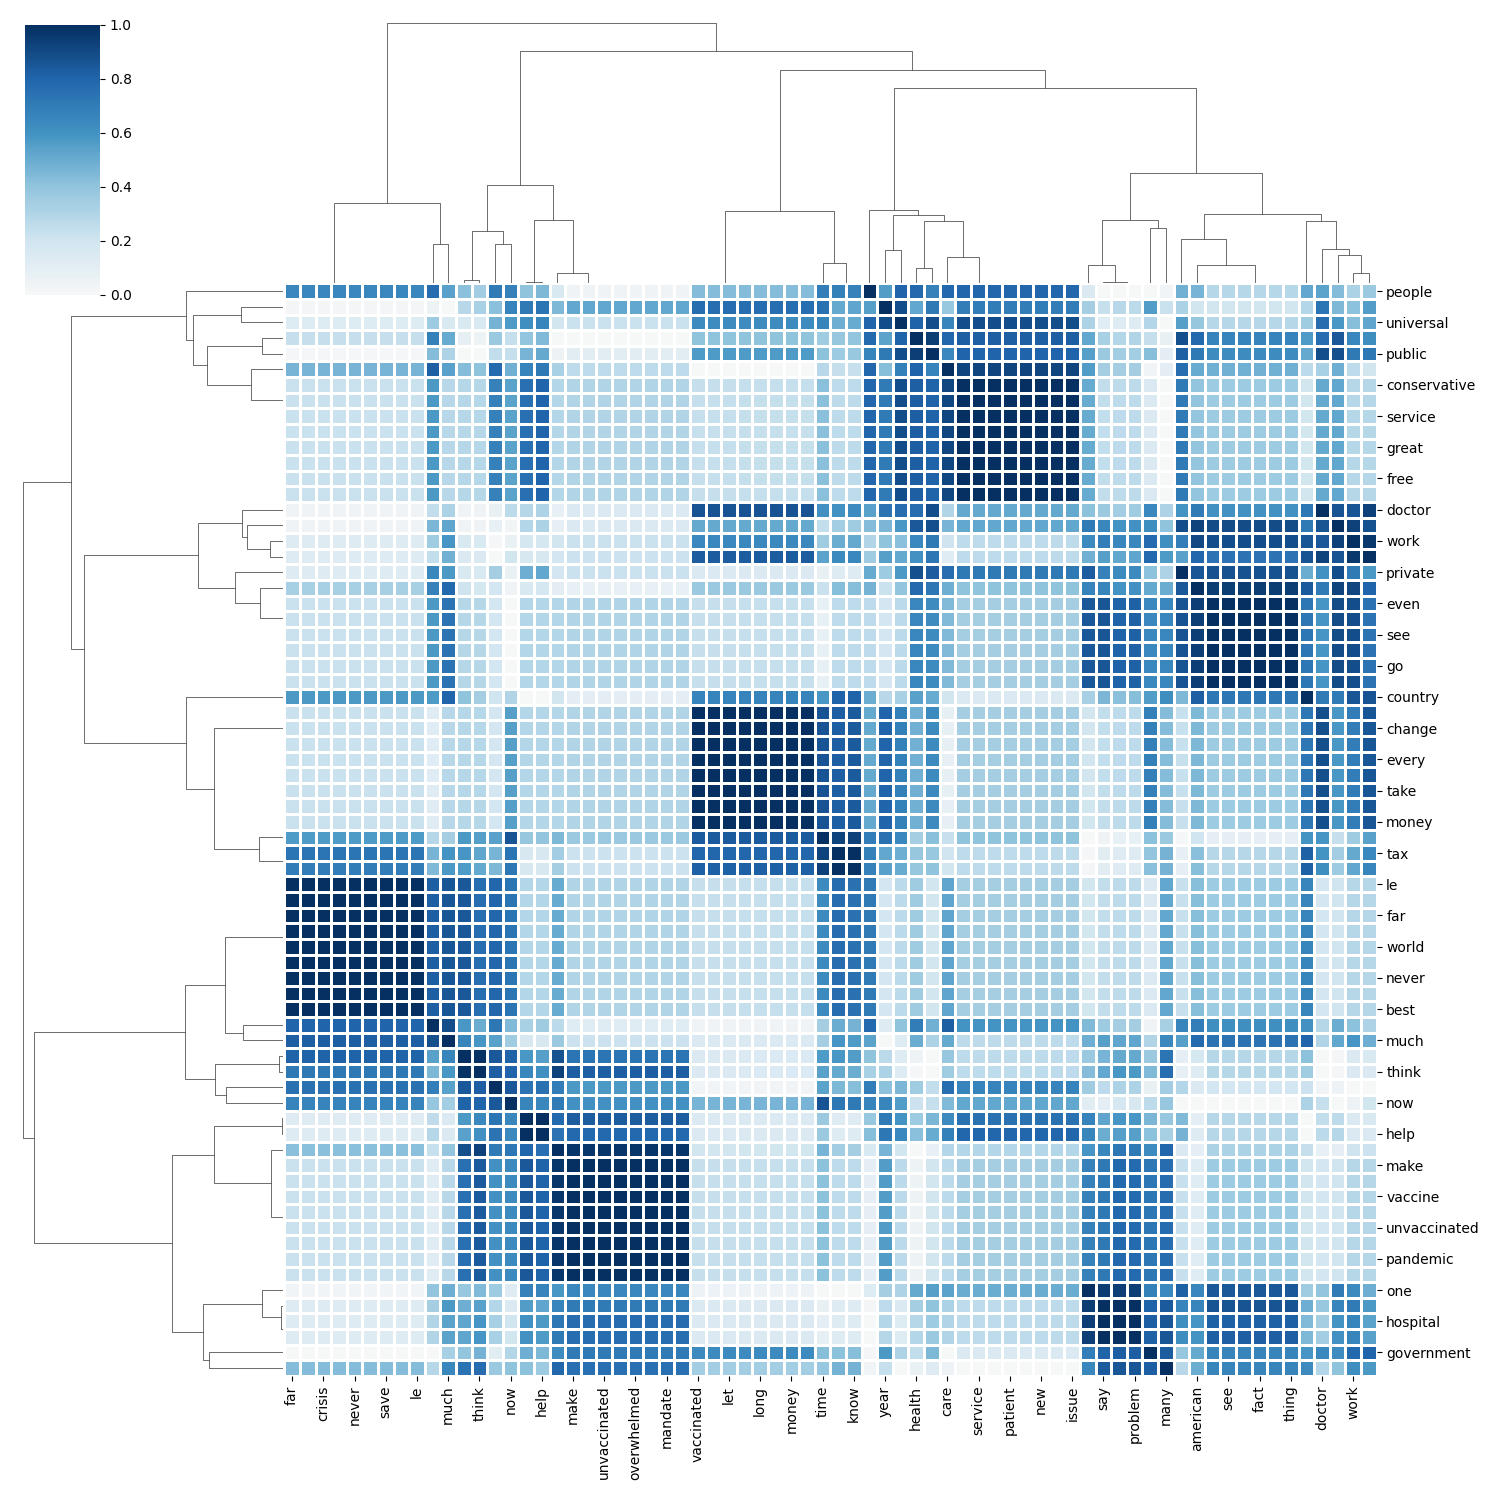

In [69]:
g=sns.clustermap(df_lda.corr(), center=0, standard_scale=1, cmap="RdBu", metric='cosine', linewidths=.75, figsize=(15, 15))
plt.setp(g.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
plt.show()
#plt.setp(ax_heatmap.get_yticklabels(), rotation=0)  # For y axis

In [70]:
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0      150.222153  -72.269554       1        1  42.342691
1       51.163364 -159.968018       2        1  23.552907
3      -73.144554   21.523815       3        1  13.700756
2      -66.410133 -110.606438       4        1  10.264382
4       54.417324   12.443444       5        1  10.139265, topic_info=                 Term       Freq       Total Category  logprob  loglift
389             covid  32.000000   32.000000  Default  30.0000  30.0000
113        government  40.000000   40.000000  Default  29.0000  29.0000
49                tax  23.000000   23.000000  Default  28.0000  28.0000
1240          mandate   8.000000    8.000000  Default  27.0000  27.0000
983           freedom  12.000000   12.000000  Default  26.0000  26.0000
173              life  27.000000   27.000000  Default  25.0000  25.0000
68               time  38.000000   38.000000  Default  24.0000  24.0000
121              year  51.000000   51.000000  Default  23.0000  23.0000
5              doctor  31.000000   31.000000  Default  22.0000  22.0000
227              many  40.000000   40.000000  Default  21.0000  21.0000
2030       vaccinated   5.000000    5.000000  Default  20.0000  20.0000
186          hospital  29.000000   29.000000  Default  19.0000  19.0000
864          american  49.000000   49.000000  Default  18.0000  18.0000
3712     unvaccinated   7.000000    7.000000  Default  17.0000  17.0000
433          pandemic  16.000000   16.000000  Default  16.0000  16.0000
66             people  77.000000   77.000000  Default  15.0000  15.0000
503              save   9.000000    9.000000  Default  14.0000  14.0000
111                go  26.000000   26.000000  Default  13.0000  13.0000
87                pay  45.000000   45.000000  Default  12.0000  12.0000
414              free  52.000000   52.000000  Default  11.0000  11.0000
512             thing  18.000000   18.000000  Default  10.0000  10.0000
339             death   8.000000    8.000000  Default   9.0000   9.0000
431               now  36.000000   36.000000  Default   8.0000   8.0000
167           country  33.000000   33.000000  Default   7.0000   7.0000
98               know  29.000000   29.000000  Default   6.0000   6.0000
26            medical  27.000000   27.000000  Default   5.0000   5.0000
34              world  18.000000   18.000000  Default   4.0000   4.0000
27               much  29.000000   29.000000  Default   3.0000   3.0000
136             right  34.000000   34.000000  Default   2.0000   2.0000
1372          vaccine   9.000000    9.000000  Default   1.0000   1.0000
4218         minority   8.835019    8.876290   Topic1  -6.1580   0.8547
4511        extremely   7.197825    7.237508   Topic1  -6.3630   0.8539
3261            punch   6.600474    6.638788   Topic1  -6.4496   0.8536
1503              win   6.512436    6.552043   Topic1  -6.4631   0.8533
3260       introduces   6.012612    6.050853   Topic1  -6.5429   0.8530
3053         campaign   5.329910    5.369881   Topic1  -6.6634   0.8519
3259             10th   6.178741    6.227007   Topic1  -6.5157   0.8516
3113          hundred   4.993169    5.032623   Topic1  -6.7287   0.8515
2418      information   4.528225    4.567868   Topic1  -6.8264   0.8507
2306            lucky   4.458830    4.498187   Topic1  -6.8419   0.8506
1343             card   8.806428    8.887713   Topic1  -6.1613   0.8502
514          designed   5.522458    5.573820   Topic1  -6.6279   0.8501
3557             peer   3.958458    3.997717   Topic1  -6.9609   0.8495
1490          require   3.273816    3.312701   Topic1  -7.1508   0.8476
406         operating   3.352099    3.392537   Topic1  -7.1272   0.8474
7280              fat   3.067867    3.106945   Topic1  -7.2158   0.8467
2617            teeth   3.038608    3.077714   Topic1  -7.2254   0.8466
2427            taxed   2.992799    3.031782   Topic1  -7.2406   0.8464
1094       suggesting  

### Topic

In [71]:
# assuming you have already trained an LDA model and named it lda_model

num_topics = lda.num_topics
num_words = 10

for i in range(num_topics):
    print(f"Topic {i}:")
    topic_words = lda.show_topic(i, num_words)
    print([word for word, prob in topic_words])


Topic 0:
['care', 'free', 'health', 'people', 'year', 'public', 'issue', 'universal', 'new', 'pay']
Topic 1:
['american', 'health', 'better', 'care', 'one', 'people', 'go', 'government', 'well', 'many']
Topic 2:
['year', 'people', 'time', 'government', 'doctor', 'tax', 'health', 'vaccinated', 'money', 'know']
Topic 3:
['care', 'people', 'pay', 'tax', 'life', 'freedom', 'much', 'time', 'right', 'now']
Topic 4:
['covid', 'government', 'mandate', 'many', 'people', 'pandemic', 'one', 'medical', 'year', 'life']


In [72]:
num_topics = lda.num_topics
num_words = 30
lambda_value = 0.5

topic_word_dict = {}
for i in range(num_topics):
    topic_words = lda.show_topic(i, num_words)
    word_list = [word for word, prob in topic_words]
    prob_list = [prob for word, prob in topic_words]
    adjusted_prob_list = [(1 - lambda_value) * prob + lambda_value * (1/num_topics) for prob in prob_list]
    topic_word_dict[f"Topic {i}"] = word_list

In [73]:
df_topic_pred = pd.DataFrame(topic_word_dict)
df_topic_pred

Topic 0     Topic 1     Topic 2     Topic 3       Topic 4
0           care    american        year        care         covid
1           free      health      people      people    government
2         health      better        time         pay       mandate
3         people        care  government         tax          many
4           year         one      doctor        life        people
5         public      people         tax     freedom      pandemic
6          issue          go      health        much           one
7      universal  government  vaccinated        time       medical
8            new        well       money       right          year
9            pay        many        know         now          life
10         great        work        take        save      hospital
11         right    hospital      public       world  unvaccinated
12       medical         pay     country        best           now
13           now     country        good        many          cost
14      american      public        long     country         death
15          help     private    american      health         think
16        better        fact       every        know       vaccine
17       private         say        wait         far         right
18       patient        much      better       never          care
19  conservative         see         now    american       problem
20           one       thing      change  understand          help
21          time      doctor        work      crisis           say
22        doctor     problem        many          le   overwhelmed
23       service        even   universal       covid          make
24         visit        good         let       think          time
25           via     surgery      family       going       country
26         money        year         one         way          even
27       million        wait    hospital        come      majority
28          good         bad        much        used      lockdown
29         every        time        even         one       support

#### Topics
- Topic 0: Politics and Public Opinion
- Topic 1: Healthcare Access and Treatment
- Topic 2: Government and Healthcare Funding
- Topic 3: COVID-19 Pandemic and Vaccination
- Topic 4: Healthcare Costs and Taxes

In [75]:
# assume your topic names are stored in a list called "topic_names"
topic_names = ['Politics and Public Opinion', 'Healthcare Access and Treatment', 'Government and Healthcare Funding', 'COVID-19 Pandemic and Vaccination', 'Healthcare Costs and Taxes']

# rename the columns to the topic names
df_topic_pred = df_topic_pred.rename(columns={f"Topic {i}": topic_names[i] for i in range(len(topic_names))})

In [76]:
df_topic_pred

Politics and Public Opinion Healthcare Access and Treatment  \
0                         care                        american   
1                         free                          health   
2                       health                          better   
3                       people                            care   
4                         year                             one   
5                       public                          people   
6                        issue                              go   
7                    universal                      government   
8                          new                            well   
9                          pay                            many   
10                       great                            work   
11                       right                        hospital   
12                     medical                             pay   
13                         now                         country   
14                    american                          public   
15                        help                         private   
16                      better                            fact   
17                     private                             say   
18                     patient                            much   
19                conservative                             see   
20                         one                           thing   
21                        time                          doctor   
22                      doctor                         problem   
23                     service                            even   
24                       visit                            good   
25                         via                         surgery   
26                       money                            year   
27                     million                            wait   
28                        good                             bad   
29                       every                            time   

   Government and Healthcare Funding COVID-19 Pandemic and Vaccination  \
0                               year                              care   
1                             people                            people   
2                               time                               pay   
3                         government                               tax   
4                             doctor                              life   
5                                tax                           freedom   
6                             health                              much   
7                         vaccinated                              time   
8                              money                             right   
9                               know                               now   
10                              take                              save   
11                            public                             world   
12                           country                              best   
13                              good                              many   
14                              long                           country   
15                          american                            health   
16                             every                              know   
17                              wait                               far   
18                            better                             never   
19                               now                          american   
20                            change                        understand   
21                              work                            crisis   
22                              many                                le   
23                         universal                             covid   
24                               let                             think   
25                            fa

In [77]:
df.head()

Unnamed: 0            ID                      Date             User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00        lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00   KristyAmbrose1   
2           2  1.624550e+18 2023-02-11 23:31:16+00:00     tomcollins80   
3           3  1.624540e+18 2023-02-11 22:48:25+00:00  CanadianGirlw69   
4           4  1.624530e+18 2023-02-11 22:01:30+00:00        B0Ghopper   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC is an obvious hit piece on anything not Liberal, Green or NDP. They are afraid of the obscure Quebec parties.   
3                                                                               https://t.co/fa23qtPgDp\nWake up people, Trudeaus spending has left us broke and not enough money for our healthcare system that at one time was one of the best in the world\nBut hey lets keep voting a narcissistic dictator nutjob back in\nIs every-one brainwashed ?   
4                                                                                                                                                                                                    @globalnews let's ask all those canadians waiting in line for their place in an over stressed healthcare system how they feel about mass immigration.   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   
2           2   en   NaN   
3           1   en   NaN   
4           0   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   
2                                               @KristyAmbrose1 @EdtheSock @babsy1234 No, I said I was trying to get some Canadian culture, my partner is a Canadian, he is here escaping taxes and your third world healthcare system.  CBC i

In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary

vectorizer = CountVectorizer()
# fit and transform the cleaned_words_c column to create a document-term matrix
doc_term_matrix = vectorizer.fit_transform(df['cleaned_words_c'].apply(lambda x: ' '.join(x)))

# convert the document-term matrix to a pandas dataframe
doc_term_df = pd.DataFrame(doc_term_matrix.toarray(), columns=vectorizer.get_feature_names())

bow_corpus = [dictionary.doc2bow(tweet) for tweet in df['cleaned_words_c']]

# create an LDA model and train it on the bag-of-words corpus
lda = LdaModel(bow_corpus, num_topics=5, id2word=dictionary)

# get the topic distribution for each tweet
topic_distribution = lda.get_document_topics(bow_corpus)

# extract the topic with the highest probability for each tweet
topics = [max(topic, key=lambda x: x[1])[0] for topic in topic_distribution]

# add the topic column to the original dataframe
df['topic'] = topics


2023-02-16 10:22:20,680 : INFO : using symmetric alpha at 0.2
2023-02-16 10:22:20,681 : INFO : using symmetric eta at 0.2
2023-02-16 10:22:20,685 : INFO : using serial LDA version on this node
2023-02-16 10:22:20,694 : INFO : running online (single-pass) LDA training, 5 topics, 1 passes over the supplied corpus of 9859 documents, updating model once every 2000 documents, evaluating perplexity every 9859 documents, iterating 50x with a convergence threshold of 0.001000
2023-02-16 10:22:20,696 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2023-02-16 10:22:20,698 : INFO : PROGRESS: pass 0, at document #2000/9859
2023-02-16 10:22:21,902 : INFO : merging changes from 2000 documents into a model of 9859 documents
2023-02-16 10:22:21,906 : INFO : topic #0 (0.200): 0.009*"better" + 0.008*"year" + 0.008*"private" + 0.008*"health" + 0.007*"province" + 0.007*"care" + 0.007*"people" + 0.007*"pay" + 0.006*"public

In [100]:
# create a dictionary to map topic numbers to their names
topic_dict = {
    0: 'Politics and Public Opinion',
    1: 'Healthcare Access and Treatment',
    2: 'Government and Healthcare Funding',
    3: 'COVID-19 Pandemic and Vaccination',
    4: 'Healthcare Costs and Taxes'
}

# apply the mapping to the current column using the map() function
df['topic'] = df['topic'].map(topic_dict)


In [102]:
df.head(2)

Unnamed: 0            ID                      Date            User  \
0           0  1.624560e+18 2023-02-11 23:45:44+00:00       lost_grrl   
1           1  1.624550e+18 2023-02-11 23:32:45+00:00  KristyAmbrose1   

                                                                                                                                                                                                                                                                                                                                                     Tweet  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   replyCount lang Place  \
0           3   en   NaN   
1           2   en   NaN   

                                                                                                                                                                                                                                                                                                                                            rendercontents  \
0  @Lifeblood_6 @MurphInCA @danperreault73 @JustinTrudeau @NORADCommand Bullshit. I've never met a Canadian (or Brit) who would willingly trade their healthcare system for ours. Private insurance in the US also has waits to see doctors but in Canada that healthcare doesn't come with a side of bankruptcy. I have health insurance and med bills...   
1                                                                                          @tomcollins80 @EdtheSock @babsy1234 Great story brah! Allow me to file it under "shit that never happened."\n\n"third world healthcare system" - And how much is YOUR medical debt? No way a Canadian said this to you!\n\nI REPEAT, "do you even GET the CBC?"   

   Like_Count       Dates      Time  day  month  year Hashtags  \
0           1  2023-02-11  23:45:44   11      2  2023       []   
1           0  2023-02-11  23:32:45   11      2  2023       []   

                                                                mentions  \
0  [Lifeblood_6, MurphInCA, danperreault73, JustinTrudeau, NORADCommand]   
1                                   [tomcollins80, EdtheSock, babsy1234]   

                                                                                                                                             cleaned_tweets  \
0  bullshit i never met canadian brit willingly trade private insurance us waits see doctors canada doesn come side bankruptcy i health insurance med bills   
1                         great story brah allow file shit never happened third world and much your medical debt no way canadian said i repeat even get cbc   

   polarity Sentiment  \
0   -0.5859  Negative   
1   -0.3182  Negative   

                                                                                                                                                                           words  \
0  [bullshit, i, never, met, canadian, brit, willingly, trade, private, insurance, u, wait, see, doctor, canada, doesn, come, side, bankruptcy, i, health, insurance, med, bill]   
1                     [great, story, brah, allow, file, shit, never, happened, third, world, and, much, your, medical, debt, no, way, canadian, said, i, repeat, even, get, cbc]   

                                                                         

In [109]:
# Group the data by user and sum the replyCount for each user
grouped_df = df.groupby(['topic','Sentiment'])['ID'].count().reset_index()
grouped_df

topic Sentiment    ID
0   COVID-19 Pandemic and Vaccination  Negative   620
1   COVID-19 Pandemic and Vaccination   Neutral   189
2   COVID-19 Pandemic and Vaccination  Positive   695
3   Government and Healthcare Funding  Negative   965
4   Government and Healthcare Funding   Neutral   148
5   Government and Healthcare Funding  Positive   770
6     Healthcare Access and Treatment  Negative  1256
7     Healthcare Access and Treatment   Neutral   242
8     Healthcare Access and Treatment  Positive  1203
9          Healthcare Costs and Taxes  Negative   869
10         Healthcare Costs and Taxes   Neutral   173
11         Healthcare Costs and Taxes  Positive   997
12        Politics and Public Opinion  Negative   678
13        Politics and Public Opinion   Neutral   253
14        Politics and Public Opinion  Positive   801